## Regridding GRIB data and extracting values at scattered locations

In this notebook we will demonstrate how to:
* interpolate GRIB data from one grid to another (regridding)
* interpolate GRIB data to scattered locations
* extract the nearest gridpoint from a fieldset


### Preparations

In [1]:
import metview as mv
import numpy as np 

We **retrieve** a temperature forecast on 1000 hPa from **MARS** for a few steps on a low resolution **reduced Gaussian grid**. We specify the grid by the Gaussian number, which is defined as the number of latitude bands between the Equator and the Poles. In our case N48 corresponds to an approximate resolution of 1.875-degree at the Equator. 

Alternatively we can read these fields from disk.

In [2]:
use_mars = False # if False, then read data from disk

In [3]:
if use_mars: 
    t = mv.retrieve(type='fc', 
                param = 't', 
                levelist = '1000', 
                levType = 'pl',
                step = [0, 6, 12, 18],            
                grid = 'N48')
else:
    t = mv.read('t_n48.grib')

### Regridding

**Grid to grid** interpolation is implemented with the [Grib Filter](https://confluence.ecmwf.int/display/METV/GRIB+Filter) icon, which, for historical reasons, is named **read()** in the Python interface. This function has almost the same set of parameters as **retrieve()** (Mars Retrieval) but instead of retrieving data from MARS it operates on the fieldset passed as the **data** parameter.

With this in mind, the **interpolation** of our fieldset onto a **global** 5x5 degree regular latlon grid can be done like this:

In [4]:
f1= mv.read(data=t, 
            grid=[5,5])

If we want interpolate onto a **sub-area** we just need to specify the **area** parameter:

In [5]:
f2 = mv.read(data=t, 
            grid=[5,5], 
            area=[10,-80,70,50]) # S,W,N,E

We will compare our two target grids to the original N48 reduced Gaussian grid by plotting the grid point locations with markers:

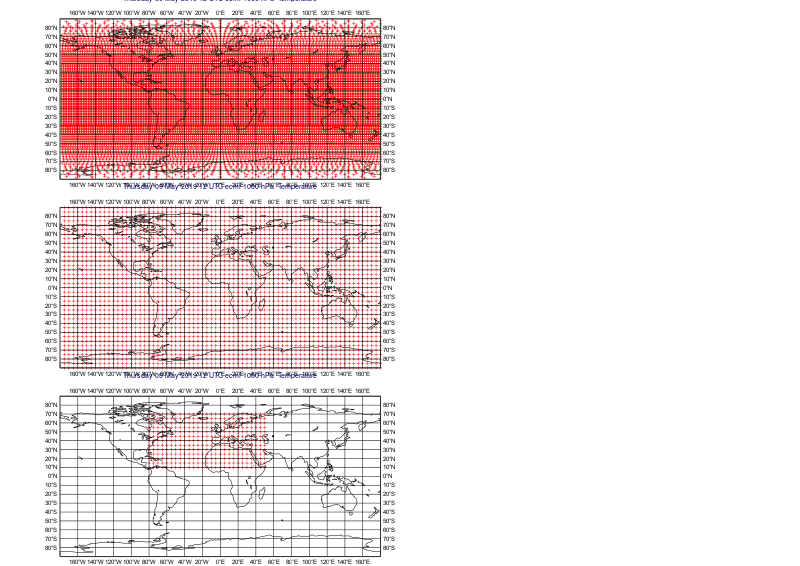

In [6]:
mv.setoutput('jupyter')

cont = mv.mcont(contour='off', contour_label='off',
               contour_grid_value_plot='on', 
               contour_grid_value_plot_type = 'marker')

dw = mv.plot_superpage(pages=mv.mvl_regular_layout(mv.geoview(),1,3,1,1))

mv.plot(dw[0], t[0], cont, 
        dw[1], f1[0], cont,
        dw[2], f2[0], cont)

### Value extraction at scattered locations

We can use the **interpolate()** function to extract field values at arbitrary locations. This function performs a bilinear interpolation with the four surrounding gridpoints and gives a single value for a given field:

In [7]:
loc = [51, -1] #lat,lon
mv.interpolate(t[0], loc)

284.35538156389595

and a list of values for multiple fields:

In [8]:
mv.interpolate(t, loc)

[284.35538156389595, 283.9915261965266, 281.6596617651846, 280.93624128343976]

We can also extract the value at the **nearest gridpoint**:

In [9]:
mv.nearest_gridpoint(t[0], loc)

284.67388916015625

and access all the **details** about it (not just its value):

In [10]:
mv.nearest_gridpoint_info(t[0], loc)

[{'distance': 77.0006,
  'index': 1580.0,
  'latitude': 51.2944,
  'longitude': 0.0,
  'value': 284.674}]

For a finer analysis there is also the **surrounding_points_indexes()**, which as its name suggests, returns the index of the surrounding points within the value array of the field (indexing starts at 0).

In [11]:
idx = mv.surrounding_points_indexes(t[0], loc)
idx

array([1580., 1723., 1724., 1867.])

Using this information we can extract the value and location of all the surrounding gridpoints:

In [12]:
idx_int = np.asarray(idx, dtype=np.int32)
vals = mv.values(t[0])[idx_int]
lats = mv.latitudes(t[0])[idx_int]
lons = mv.longitudes(t[0])[idx_int]
for i in range(0, len(vals)):
    print('lat:{} lon:{} val:{}'.format(lats[i], lons[i], vals[i]))

lat:51.29437713895115 lon:0.0 val:284.67388916015625
lat:51.29437713895115 lon:357.5 val:283.85357666015625
lat:49.42915369712305 lon:0.0 val:284.34967041015625
lat:49.42915369712305 lon:357.5 val:284.49224853515625


# Additional resources

- [Introductory Metview training course](https://confluence.ecmwf.int/display/METV/Data+analysis+and+visualisation+using+Metview)
- [Metview's Python interface](https://confluence.ecmwf.int/display/METV/Metview%27s+Python+Interface)
- [Function list](https://confluence.ecmwf.int/display/METV/List+of+Operators+and+Functions)